# OOP: Hopping Scan

In [1]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.experiments.scan import Scan
import numpy as np

%load_ext autoreload
%autoreload 2

In [46]:
scan = Scan(datadir = "S:/UsersData/Martin/2019/03_Mar/15/sicm/scan6",
               exp_name = "scan6", x_trim = [52.0, 53.0], y_trim = [52.75, 53.25])

ValueError: min() arg is an empty sequence

In [2]:
scan = Scan(datadir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/22/deposition15",
               exp_name = "deposition15", scan_type = "it")

Avaliable data:
dict_keys(['dt(s)', 'X(um)', 'LockinAmplitude', 'Z(um)', 'Y(um)', 'LineNumber', 'LockinPhase'])
Number of datapoints = (95041,)
Number of datapoints = 87147
Veryfying X, Y extents:
xmax: 56.016724143, xmin: 43.995483261,
ymax: 59.868160039, ymin: 43.995483261
xdiff: 12.021240882, ydiff: 15.872676778000006


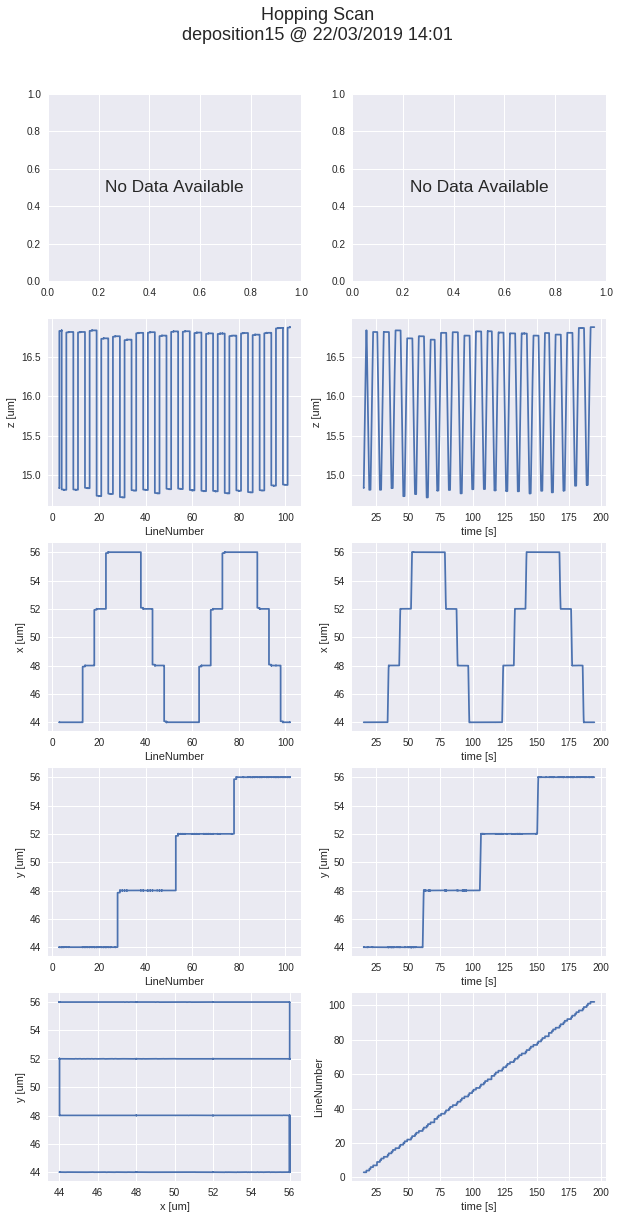

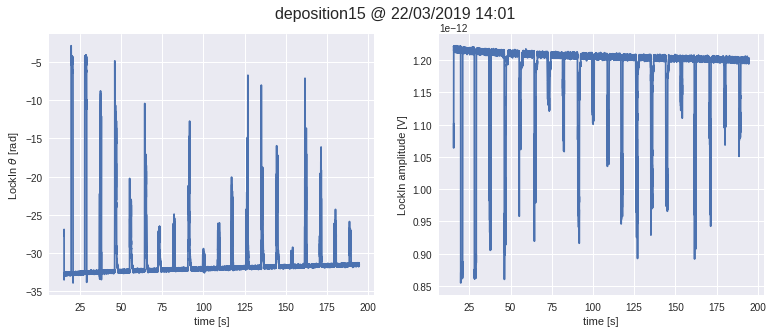

In [3]:
scan.plot_hopping_scan()

Saved figure to S:\UsersData\Martin\2019\03_Mar\15\sicm\scan6\scan6_15032019_1521.pdf.


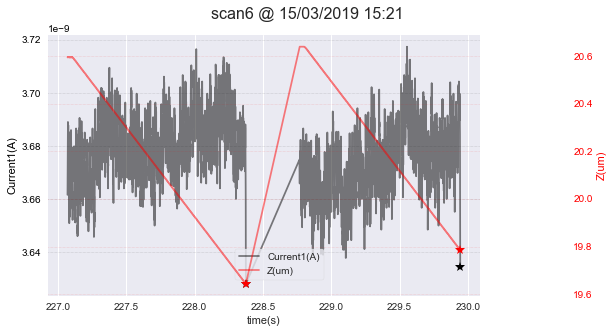

In [40]:
sel = np.nonzero(np.logical_and(scan.data["LineNumber"] > 370,
                               scan.data["LineNumber"] < 375))[0]
scan.plot_hops(sel)

> /home/mholub/git/sicm/sicm/measurements/hops.py(49)_select_data()
-> subresult = {k:v[sel] for k,v in self.data.items() if k in subkeys}
(Pdb) c
> /home/mholub/git/sicm/sicm/measurements/hops.py(49)_select_data()
-> subresult = {k:v[sel] for k,v in self.data.items() if k in subkeys}
(Pdb) c
Saved figure to /run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/22/deposition15/deposition15_22032019_1401.pdf.


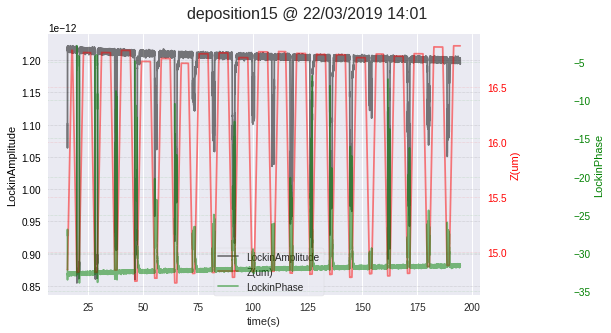

In [3]:
scan.plot_hops()

Saved figure to /run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/22/deposition15/deposition15_22032019_1401.pdf.


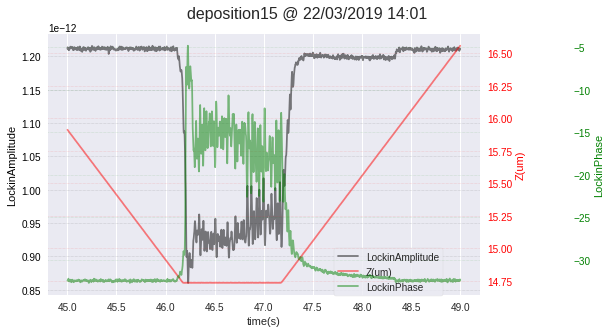

In [5]:
scan.plot_hops([45.,49.0])

Saved figure to /run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/22/deposition2/deposition2_22032019_0911.pdf.


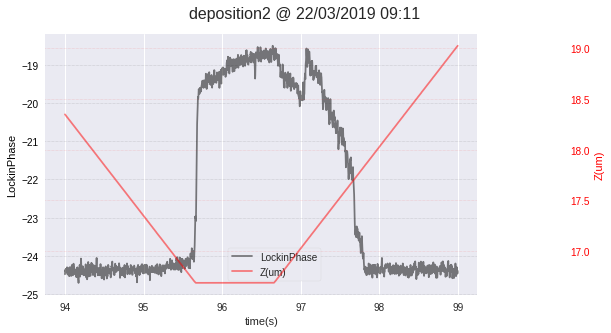

In [98]:
scan.plot_hops([94.,99.0])

Saved figure to /run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/22/deposition10/deposition10_22032019_1241.pdf.


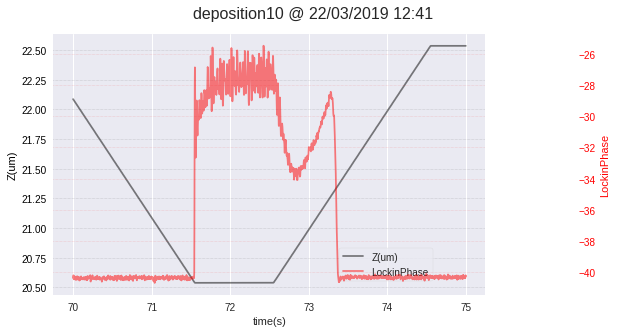

In [72]:
scan.plot_hops([70.0, 75.])

Saved dataframe to S:/UsersData/Martin/2019/03_Mar/15/sicm/scan6\scan6_annot.pkl.


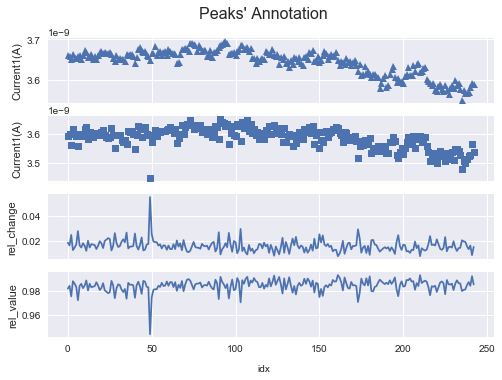

In [38]:
scan.annotate_peaks(sel = [0.0, 440.0], window_size=50)

## Additional functionality

#### Looking at selected line
Used for debugging line-by-line artifacts

In [6]:
# # Select a line to look at
# axis = "X"
# ax_vals = np.unique(scan.dsdata["{}(um)".format(axis)])
# print(ax_vals)
# diff = np.mean(np.abs(np.diff(ax_vals)))
# coord = 45.01
# sel = np.where(np.logical_and(
#                         scan.dsdata["{}(um)".format(axis)] > coord - (diff - 0.2*diff),
#                         scan.dsdata["{}(um)".format(axis)] < coord + (diff - 0.2*diff)))[0]

[44.00769066 56.01062044 56.01367229]


X(um) = 45.011


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


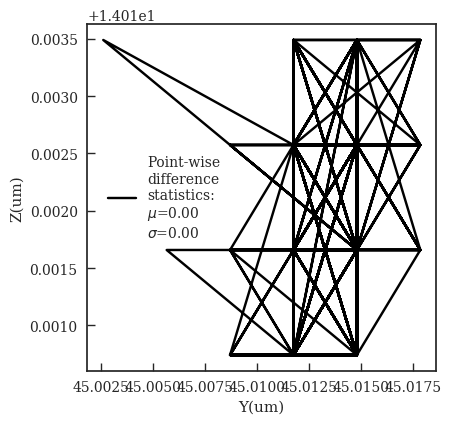

In [39]:
# Show single line once more separately
axis2 = "X" if axis == "Y" else "Y"
print("{}(um) = {:.3f}".format(axis, 
                               np.mean(scan.dsdata["{}(um)".format(axis)][sel])))
leg = "Point-wise difference statistics:\n$\mu$={:.2f}\n$\sigma$={:.2f}".format(
    np.mean(np.abs(np.diff(scan.dsdata["Z(um)"][sel].flatten()))),
    np.std(np.abs(np.diff(scan.dsdata["Z(um)"][sel].flatten()))))
plots.plot_generic([scan.dsdata["{}(um)".format(axis2)][sel]],
                  [scan.dsdata["Z(um)"][sel]],
                  ["{}(um)".format(axis2)], ["Z(um)"], leg)

#### Determining Line Number
Used when unsure which line number to plot

In [228]:
import numpy as np
uniqs, cnts = np.unique(scan._data["LineNumber"], return_counts=True)
sel = np.nonzero(np.in1d(scan._data["LineNumber"],
                         np.append(np.arange(6, np.max(uniqs), 6),
                                  np.arange(6, np.max(uniqs), 6))))[0]
 plots.plot_sicm(scan._data, sel)

#### Retreact Distance Statistics

Used for debugging issues with approaches.

In [11]:
ln_diffs = []
for ln in np.unique(scan.data["LineNumber"])[:-1]:
    ln1 = scan.data["Z(um)"][scan.data["LineNumber"] == ln][-1]
    ln2 = scan.data["Z(um)"][scan.data["LineNumber"] == ln + 3.0][0]
    ln_diffs.append(np.abs(ln2 - ln1))
print("Retract distance statistics:\n" + \
      "$\mu$={:.4f}\n$\sigma$={:.2f}".format(np.mean(ln_diffs), np.std(ln_diffs)))

Retract distance statistics:
$\mu$=0.4870
$\sigma$=0.00


---

# OOP: Approach

In [21]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.sicm import Approach, Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
app = Approach(datadir = "S:\\UsersData\\Martin\\2019\\03_Mar\\15\\sicm\\approach3",
              exp_name = "approach3")

ValueError: min() arg is an empty sequence

In [ ]:
app = Approach(datadir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/22/deposition1",
               exp_name = "deposition1")
# this is very simplistic but does the job for now.
# app.plot()

Avaliable data:
dict_keys(['LineNumber', 'dt(s)', 'LockinAmplitude', 'Y(um)', 'Z(um)', 'LockinPhase', 'X(um)'])
Number of datapoints = (108118,)
Number of datapoints = 45


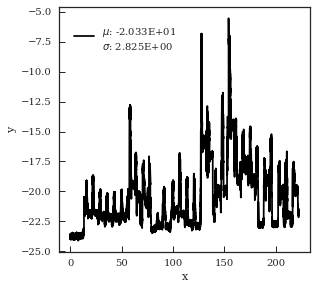

In [27]:
# Normally, use dsdata!
sig = Signal(x = np.cumsum(app._data["dt(s)"]), 
                      y = app._data["LockinPhase"])
# sig.analyze(range = [0., 50.0], what = "psd")
sig.plot()

# Getting noise level

In [94]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np
from os import path

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Do it from `Watch Current` Data

In [161]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/pdms/10nm"
exp_name = "watchcurrent_noisepattern"
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['V1(V)', 'LineNumber', 'Current1(A)', 'dt(s)'])
Number of datapoints = (54798,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\21\steph_plasmacleaned\watchcurrent_noisepattern_psd.pdf.


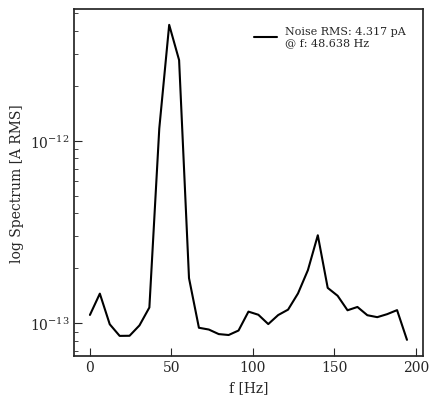

In [164]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
fpath = path.normpath(path.join(datadir, exp_name))
sig.analyze(what = "psd", fpath = fpath, range = [60.0, 130.0])

## Do it from `Approach Data`

In [197]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/steph_glass_plasmaclean/10nm/app2"
exp_name = "approach_noise_level_newtip"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)
fpath = path.normpath(path.join(datadir, exp_name))

# get idea of range to plot
# plots.plot_hopping_scan(result_, None, exp_name, date)

Avaliable data:
dict_keys(['Z(um)', 'LineNumber', 'Current1(A)', 'V1(V)', 'dt(s)'])
Number of datapoints = (70973,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\22\steph_glass_plasmaclean\10nm\app2\approach_noise_level_newtip_noise.pdf.


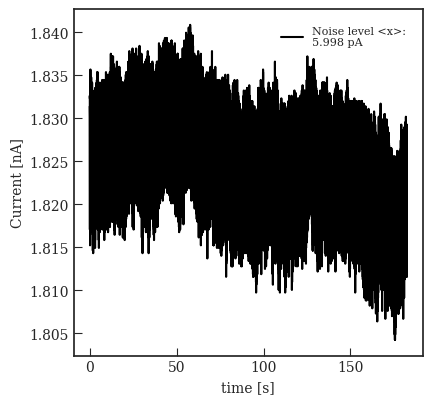

In [199]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.analyze(what = "noise", fpath = fpath)

# Signal

In [41]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
np.mean([ 8, 6, 11 , 8, 4.5, 6, 6.5, 5, 8.5, 4, 4])

6.5

Avaliable data:
dict_keys(['Current1(A)', 'V1(V)', 'dt(s)', 'LineNumber'])
Number of datapoints = (11480,)


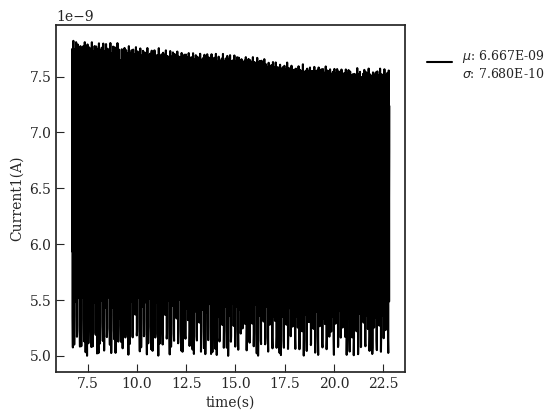

In [64]:
# datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph_plasmacleaned"
# exp_name = "funny_noise_patterns"

datadir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/03_Mar/20/tip_current_2um"
exp_name = "11"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

sel = np.argwhere(result_["Current1(A)"] > 5e-9)

sig = Signal(x = np.cumsum(result_["dt(s)"])[sel], 
                      y = result_["Current1(A)"][sel])
sig.plot("time(s)", "Current1(A)")

# CV

In [12]:
import sys
sys.path.append("..")

from sicm.sicm import CV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['dt(s)', 'Current1(A)', 'LineNumber', 'V1(V)'])
Number of datapoints = (19777,)
Number of datapoints = 9
Saved figure to S:\UsersData\Martin\2019\03_Mar\14\sicm\cv1\cv1_14032019_1122.pdf.


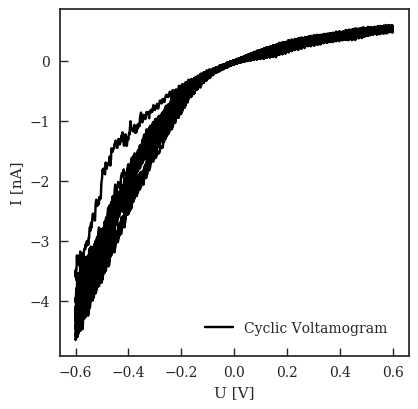

In [13]:
cv = CV(datadir = "S:/UsersData/Martin/2019/03_Mar/14/sicm/cv1",
        exp_name = "cv1")
# this is very simplistic but does the job for now.
cv.plot()

------------------
# Not used anymore

## Cyclic Voltametry

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

import sys
sys.path.append("..")

from sicm import io, plots, analysis, utils

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [8]:
# vars
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
exp_name = "cv2"

In [9]:
files, date = io.get_files(datadir, exp_name)
result = io.load_result(files)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

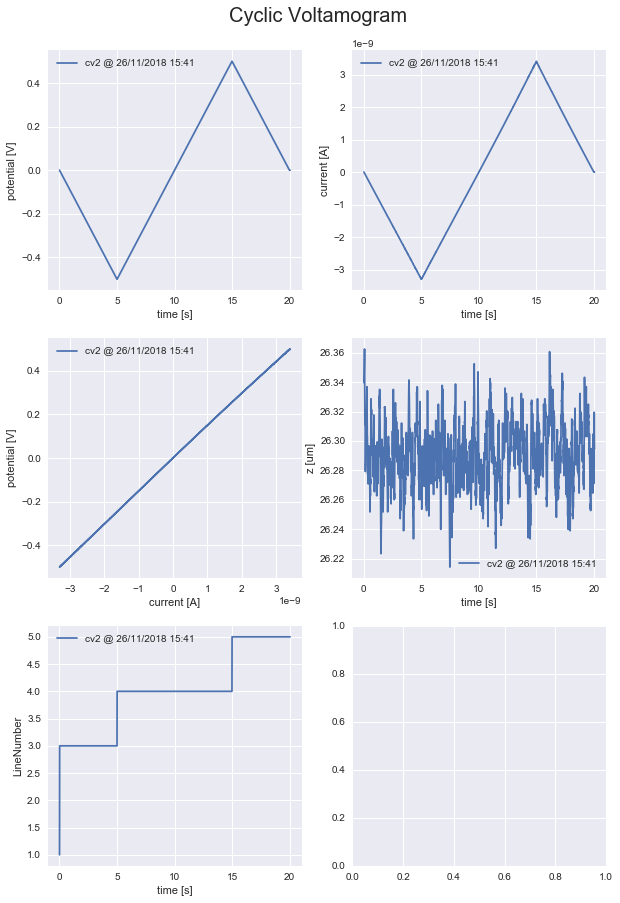

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))